<a href="https://colab.research.google.com/github/kakumanu-sudhir/ml-algos/blob/master/01_KNN_Fruits_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint
## Not for grades

## Learning Objective

The objective of this experiment is to understand Knn classifier.

## Dataset

The dataset chosen for this  experiment is a handmade fruits dataset. The dataset contains 60 records. Each record represents the following details of fruits : 

*  Weight -   It is the mass of an object. With respect to this dataset, we have calculated the weights in grams 

* Sphericity -   is a measure of how closely the shape of an object approaches that of a mathematically perfect sphere.

* Color -  Every fruit has a different color at different stages. You can encode the color to an integer value. For example

     - Orange as 22
     - Greenish Yellow as 23
     - Green as 24
     - Red as 25
     - Reddish Yellow as 26

*  Label -   We have considered two fruits for simplicity. They are Apple and Orange.




### Setup Steps

In [0]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2001444" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "8095532087" #@param {type:"string"}


In [4]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook="01_KNN_Fruits_data" #name of the notebook
Answer = "Ungraded"
def setup():
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/fruits_weight_sphercity.csv")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      print("Your submission is successful.")
      print("Ref Id:", submission_id)
      print("Date of submission: ", r["date"])
      print("Time of submission: ", r["time"])
      print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
     # print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


#### Importing Required Packages

In [0]:
import numpy as np
import matplotlib.pyplot as plt

#### Loading the data

In [0]:
def labels_converter(s):
  s = s.lower()
  if s == "orange":
    return 0
  if s == "apple":
    return 1
  return -1

In [0]:
def color_converter(s):
  s = s.lower()
  if s == 'green':
    return 20 #Could you try 25,26,27,28,29 instead of 20,40,60,80,100? Is it causing a dip in accuracy? Could you reason why?
  if s == 'greenish yellow':
    return 40
  if s == 'orange':
    return 60
  if s == 'red':
    return 80
  if s == 'reddish yellow':
    return 100
  return -1


In [0]:
import pandas as pd
fruits_data = pd.read_csv("fruits_weight_sphercity.csv",converters={"labels":labels_converter,"Color":color_converter})

To get better understanding of the data let us visualize first five rows of the data using head () and last five rows of the data using tail()

In [9]:
fruits_data.head()

,Color,Weight,Sphericity,labels
0,80,200,0.40,1
1,60,320,1.00,0
2,60,310,0.95,0
3,80,220,0.45,1
4,80,230,0.50,1


In [10]:
fruits_data.tail()

,Color,Weight,Sphericity,labels
64,80,200,0.43,1
65,80,200,0.49,1
66,80,200,0.42,1
67,80,201,0.40,1
68,80,202,0.40,1


In [0]:
# Storing data and labels in two seperate variables
data = fruits_data[["Weight","Color","Sphericity", "labels"]] 
labels = fruits_data["labels"]

In [12]:
labels

0     1
1     0
2     0
3     1
4     1
     ..
64    1
65    1
66    1
67    1
68    1
Name: labels, Length: 69, dtype: int64

### Splitting the data into train and test sets 

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
 # Training and testing set ratio is 70 : 30
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=42)

In [15]:
# Let us see the size of train and  test sets
X_train.shape, X_test.shape

((46, 4), (23, 4))

In [16]:
# Let us see first five rows of the training data

X_train[:5]

,Weight,Color,Sphericity,labels
28,330,20,0.89,0
7,330,40,0.98,0
61,344,20,0.68,0
40,204,80,0.40,1
50,272,60,0.80,0


In [17]:
X_test[:5]

,Weight,Color,Sphericity,labels
22,326,20,0.98,0
0,200,80,0.40,1
47,225,80,0.25,1
4,230,80,0.50,1
53,333,40,0.92,0


In [18]:
y_train[:5]

28    0
7     0
61    0
40    1
50    0
Name: labels, dtype: int64

### Training a  Knn Classifier 

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
k = 7
neigh = KNeighborsClassifier(n_neighbors=k,metric='euclidean')

In [61]:
# Training or fitting the model with the train data
neigh.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [0]:
# Testing the trained model
pred = neigh.predict(X_test)

In [63]:
pred[:]

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1])

In [64]:
pred.T

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1])

In [65]:
import numpy as np
pred2 = np.column_stack((X_test,pred.T))
pred2

array([[3.26e+02, 2.00e+01, 9.80e-01, 0.00e+00, 0.00e+00],
       [2.00e+02, 8.00e+01, 4.00e-01, 1.00e+00, 1.00e+00],
       [2.25e+02, 8.00e+01, 2.50e-01, 1.00e+00, 1.00e+00],
       [2.30e+02, 8.00e+01, 5.00e-01, 1.00e+00, 1.00e+00],
       [3.33e+02, 4.00e+01, 9.20e-01, 0.00e+00, 0.00e+00],
       [2.66e+02, 2.00e+01, 6.80e-01, 0.00e+00, 0.00e+00],
       [3.33e+02, 4.00e+01, 9.20e-01, 0.00e+00, 0.00e+00],
       [2.71e+02, 2.00e+01, 5.50e-01, 1.00e+00, 0.00e+00],
       [3.46e+02, 6.00e+01, 1.00e+00, 0.00e+00, 0.00e+00],
       [2.59e+02, 2.00e+01, 4.20e-01, 1.00e+00, 1.00e+00],
       [2.55e+02, 2.00e+01, 6.90e-01, 0.00e+00, 1.00e+00],
       [2.43e+02, 8.00e+01, 5.30e-01, 1.00e+00, 1.00e+00],
       [3.10e+02, 4.00e+01, 7.50e-01, 0.00e+00, 0.00e+00],
       [2.45e+02, 8.00e+01, 4.00e-01, 1.00e+00, 1.00e+00],
       [2.02e+02, 8.00e+01, 4.00e-01, 1.00e+00, 1.00e+00],
       [2.69e+02, 2.00e+01, 6.70e-01, 0.00e+00, 0.00e+00],
       [2.01e+02, 1.00e+02, 7.00e-01, 1.00e+00, 1.00e+00

In [66]:
# Calculating the score
neigh.score(X_test,y_test)

0.9130434782608695

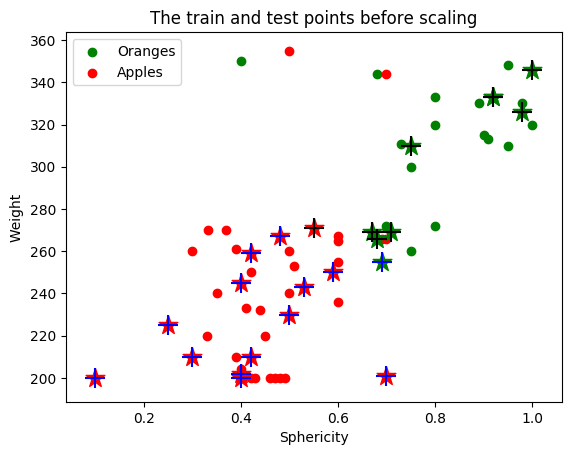

In [73]:
plt.style.use('default')
oranges = X_train[X_train.labels == 0]
apples = X_train[X_train.labels == 1]
plt.scatter(oranges.Sphericity, oranges.Weight,color="green",marker="o") # Training data
plt.scatter(apples.Sphericity, apples.Weight,color="red",marker="o") # Training data
oranges = X_test[X_test.labels == 0]  
apples = X_test[X_test.labels == 1]
plt.scatter(oranges.Sphericity, oranges.Weight,color="green",marker="*",s=200) # Testing data
plt.scatter(apples.Sphericity, apples.Weight,color="red",marker="*",s=200) #Testing data
oranges = pred2[pred2[:,4] == 0]  
apples = pred2[pred2[:,4] == 1]
plt.scatter(oranges[:,2], oranges[:,0],color="black",marker="+",s=200) # Predicted data
plt.scatter(apples[:,2], apples[:,0],color="blue",marker="+",s=200) #Predicted data
plt.xlabel("Sphericity")
plt.ylabel("Weight")
plt.legend(["Oranges", "Apples"])
plt.title("The train and test points before scaling")
plt.show()


### Exercise : Try to observe the change in score by changing the k value to 5

### Please answer the questions below to complete the experiment:

In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "" #@param ["","Yes", "No"]

In [0]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [72]:
#@title Run this cell to submit your notebook  { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Please answer Complexity Question
